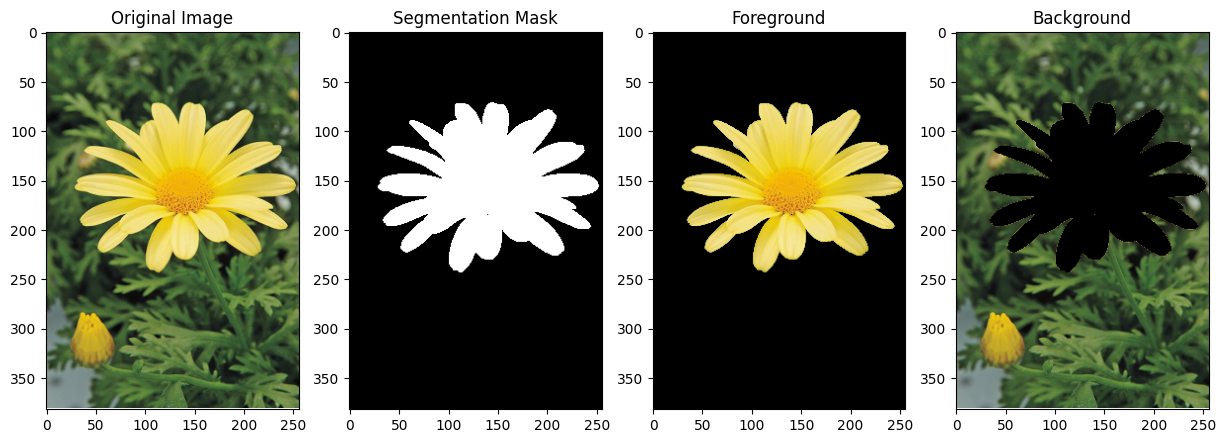

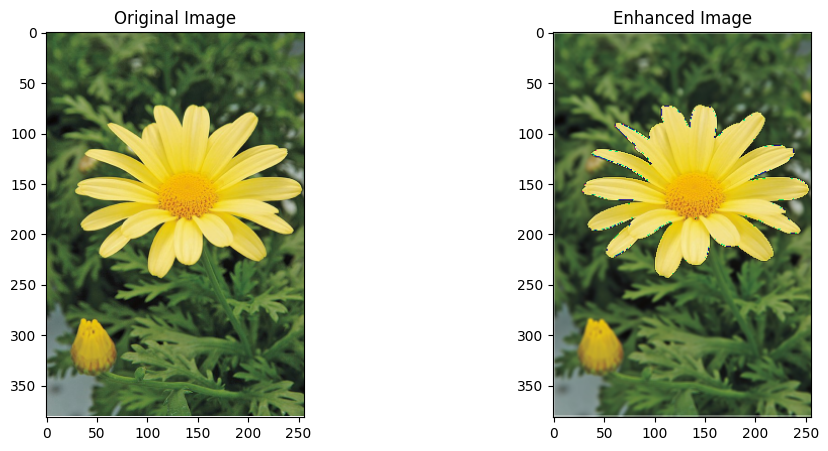

In [33]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('flower.png')
mask = np.zeros(image.shape[:2], np.uint8)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
rectangle = (25, 50, 400, 200)
cv2.grabCut(image, mask, rectangle,backgroundModel, foregroundModel,3, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
Fore_img = image * mask2[:, :, np.newaxis]
Back_img = image * (1 - mask2[:, :, np.newaxis])
blurred_back = cv2.blur(Back_img, (3,3))
final_img = Fore_img + blurred_back

plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 4, 2)
plt.imshow(mask2, cmap='gray')
plt.title("Segmentation Mask")

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(Fore_img, cv2.COLOR_BGR2RGB))
plt.title("Foreground")

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(Back_img, cv2.COLOR_BGR2RGB))
plt.title("Background")

plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.title("Enhanced Image")

plt.show()
